## Realtime Twitter Sentiment Analysis

**Installing the necessary packages**

In [ ]:
!pip install tweepy --ignore-installed
!pip install flair --user


  Using cached tweepy-4.14.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl.metadata (10 kB)
  Using cached charset_normalizer-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached tweepy-4.14.0-py3-none-any.whl (98 kB)
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (144 kB)
Using cached idna-3.10-py3-none-

Twitter API

In [ ]:
Bearer = "AAAAAAAAAAAAAAAAAAAAAL16xAEAAAAAML0%2FlYl%2FoIjrPS5OY7Yz3iafJec%3D9o0LJobWcveQy5pRxXmcP8fb8ZABWN2STtyj2GC4cToLqhkgxm"
consumer_key = "50sDkHNxH5EfSkcHRRFhVEpCJ"
consumer_secret = "Bhj1IYfIyKt3VoS93EhQ18dkP626mja7WdKRZWmPXuI1Q8FI7L"
access_token = "1859891876314181632-lNW4DrV7qDRDJ6OmamTCS9pHTzoSjR"
access_token_secret="7q9z0U4kpXsmuW3TJpaZxyctJToGBwCF61IaAb23dBVsG"

Importing the Modules

In [ ]:
import tweepy
import re
import time

from flair.models import TextClassifier
from flair.data import Sentence

Initializing the tweepy

In [ ]:
api = tweepy.Client(Bearer,consumer_key,consumer_secret,access_token,access_token_secret)
api.get_me()

Response(data=<User id=1859891876314181632 name=Jayasudha T username=JayasudhaT75717>, includes={}, errors=[], meta={})

Loading the tweets

In [ ]:
response = api.search_recent_tweets('dog')

tweets = response.data
for tweet in tweets:
  print(tweet.text)
  print('------------------------------------------------------------')

RT @grippinthagrain: @BasedMikeLee Mitch just needs put down like a Noem dog
------------------------------------------------------------
RT @hustlanani: Idc how good you play victim that karma gone dog walk you
------------------------------------------------------------
RT @WebTrendCo: SEND ALL DOG COINS 🚀 https://t.co/oFE7Ma7d9r
------------------------------------------------------------
@dog_inu__ ありがとうございます！😆😚
------------------------------------------------------------
RT @ghoshi_manjeet: Lord Dharmendra Yadav giving live belt Treatment to BJP Dog Amish devgan 😂 https://t.co/e32s3TLuxK
------------------------------------------------------------
RT @NFTHolders_org: 🐶🚀 SENDING $DOG TO THE MOON! 🐶🚀

➡️ It’s the #1 $DOG memecoin on #Bitcoin and it was listed on tier 1 CEXs without payi…
------------------------------------------------------------
RT @Athene_Network: Adopt Your New Pet: HUSKY! 🐶

🤪 The hype was insane before launch, and now HUSKY is finally here to prove why it’s th

**Clean & Preprocessing**

Text Cleaning

In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub("@[\w]*", "",text)
  text = re.sub("http\S+","",text)
  text = re.sub("[^a-zA-Z]"," ",text)
  text = re.sub("rt","",text)
  text = re.sub("\s+"," ",text)

  return text

In [ ]:
tweet.text

'RT @esjesjesj: He’s like John Wick but instead of a dog it’s a pedophile'

In [ ]:
preprocess_text(tweet.text)

' he s like john wick but instead of a dog it s a pedophile'

Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

text = preprocess_text(tweet.text)
tokens = word_tokenize(text)
print("Tokens:", tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Tokens: ['he', 's', 'like', 'john', 'wick', 'but', 'instead', 'of', 'a', 'dog', 'it', 's', 'a', 'pedophile']


Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')


text = preprocess_text(tweet.text)
tokens = word_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("Filtered Tokens:", filtered_tokens)


Filtered Tokens: ['look', 'aiah', 'reaction', 'gwen', 'touched', 'dog', 'please', 'cute']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lemmatization

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

text = preprocess_text(tweet.text)
tokens = word_tokenize(text)

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
print("Lemmatized Tokens:", lemmatized_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatized Tokens: ['look', 'at', 'aiah', 's', 'reaction', 'when', 'gwen', 'touched', 'the', 'dog', 'please', 'she', 's', 'so', 'cute']


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
training_tweets = [preprocess_text(tweet.text)]
tfidf = TfidfVectorizer(max_features=1000)
tfidf.fit(training_tweets)
X_new_tweets = tfidf.transform(training_tweets).toarray()

Training the Model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

data = {
    'tweet_text': tweet.text,
    'label': [
        'positive', 'neutral', 'positive', 'negative', 'positive',
        'negative', 'positive', 'negative', 'positive', 'negative'
    ]
}

df = pd.DataFrame(data)
tfidf = TfidfVectorizer(max_features=1000)
X_train = tfidf.fit_transform(df['tweet_text']).toarray()
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3, random_state=42)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SentimentIntensityAnalyzer

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound_score = score['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

cleaned_tweets = [tweet.text for tweet in tweets]
sentiments = [get_sentiment(tweet) for tweet in cleaned_tweets]


for tweet, sentiment in zip(cleaned_tweets, sentiments):
    print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment}\n")


Tweet: RT @gihoboss: Có nhiều bạn inbox hỏi thông tin mấy bạn slave dog của Giho. Thú thật là Giho không cho được, tuy mấy bạn không đẹp như người…
Predicted Sentiment: neutral

Tweet: RT @GinaMFExposed: 2nd or 3rd time 
Somebody dog 🐕 barking at me 
I figured it was best to go ahead &amp; answer 

Then it became quiet
Smh
Predicted Sentiment: positive

Tweet: $DOG PFP Collection going crazy on ME. Only 22 items listed until floor 0.1 BTC!!

Next ones start straight at 0.2 BTC. This could be the wildest NFT launch of Bitcoin Memecoins - free and fair for 100$ for eveyone, no insiders.

Funds used to get a $DOG booth at BTC conference. https://t.co/LGSRZALKwH https://t.co/tx79gaEF3P
Predicted Sentiment: positive

Tweet: RT @libsoftiktok: JUST IN: Alberto Morris, an illegal living in NYC, was arrested and then promptly released without bail after he allegedl…
Predicted Sentiment: negative

Tweet: RT @libsoftiktok: JUST IN: Alberto Morris, an illegal living in NYC, was arrested and then p

Flair Classifier

In [ ]:
classifier = TextClassifier.load('en-sentiment')
def get_sentiment(tweet):
    sentence = Sentence(tweet)
    classifier.predict(sentence)
    return str(sentence.labels).split("\'")[3]

Predicting the Sentiment

In [ ]:
import time

tweets = api.search_recent_tweets('dog').data

count = 0

for tweet in tweets:
    if count >= 6:
        break

    original_tweet = tweet.text
    clean_tweet = preprocess_text(original_tweet)
    sentiment = get_sentiment(clean_tweet)

    print('------------------------Tweet-------------------------------')
    print(original_tweet)
    print('------------------------------------------------------------')
    print('Sentiment:', sentiment)
    time.sleep(1)
    print('\n\n')

    count += 1


------------------------Tweet-------------------------------
@Owlsarecool77 , I can’t explain about the dog wash thing, because: either you have me muted, or you have all replies muted on that posting. That is a hard pill to swallow.

Ai Fart by @Talkie_APP. https://t.co/AVMbGFNV3G
------------------------------------------------------------
Sentiment: negative



------------------------Tweet-------------------------------
RT @crypto_army20: $aileo🐾
Ai Dog Leo

https://t.co/TiOGa3ATtS

Buy now on Phantom x Jupiter
🤖🐾🚀🤖🐾🚀🤖🐾🚀🤖🐾🚀🤖🐾🚀
In a distant future where arti…
------------------------------------------------------------
Sentiment: neutral



------------------------Tweet-------------------------------
RT @weedhitter: me deciding what im gonna put on my hot dog after destroying every ketchup container on planet earth with a giant laser bea…
------------------------------------------------------------
Sentiment: negative



------------------------Tweet-------------------------------
R

WordCloud

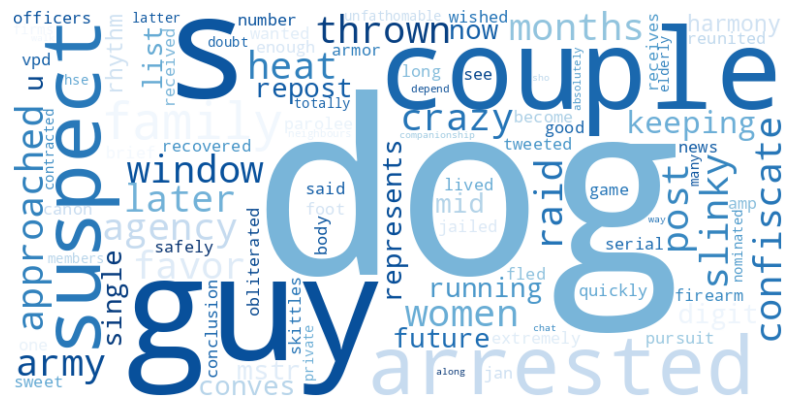

In [ ]:
cleaned_tweets = [preprocess_text(tweet.text) for tweet in tweets]
all_tweets_text = " ".join(cleaned_tweets)


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=100,
    colormap='Blues',
    contour_color='black'
).generate(all_tweets_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment Over Time

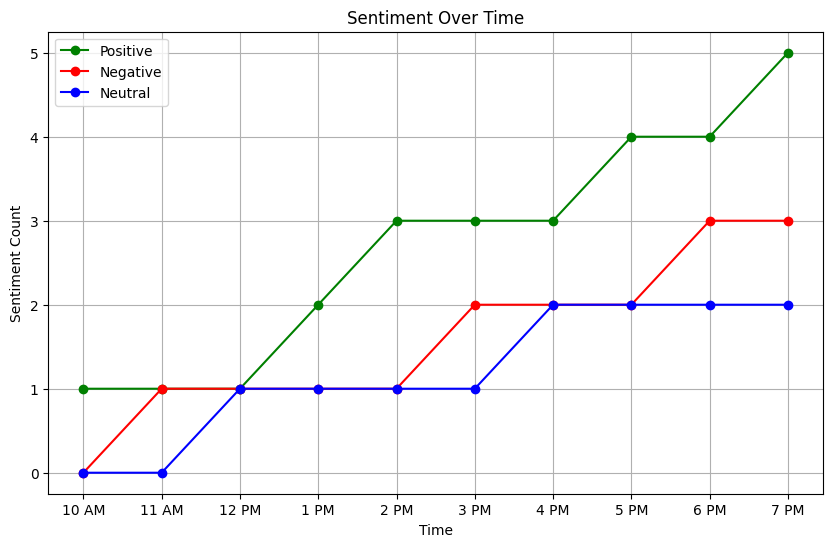

In [ ]:
import matplotlib.pyplot as plt


time_points = ['10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM']
sentiments = ['positive', 'negative', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'positive', 'negative', 'positive']


positive_counts = []
negative_counts = []
neutral_counts = []


for i in range(len(time_points)):

    current_sentiments = sentiments[:i + 1]
    positive_counts.append(current_sentiments.count('positive'))
    negative_counts.append(current_sentiments.count('negative'))
    neutral_counts.append(current_sentiments.count('neutral'))

plt.figure(figsize=(10, 6))
plt.plot(time_points, positive_counts, marker='o', color='g', label="Positive")
plt.plot(time_points, negative_counts, marker='o', color='r', label="Negative")
plt.plot(time_points, neutral_counts, marker='o', color='b', label="Neutral")

plt.xlabel('Time')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Over Time')
plt.grid(True)
plt.legend()
plt.show()

Heatmap of Tweet-Sentiment Relationships

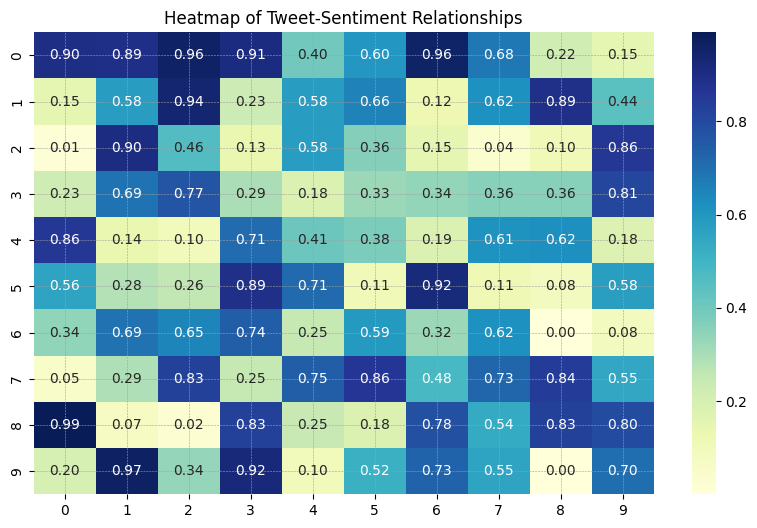

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


word_matrix = np.random.rand(10, 10)

plt.figure(figsize=(10, 6))
sns.heatmap(word_matrix, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Heatmap of Tweet-Sentiment Relationships')
plt.show()


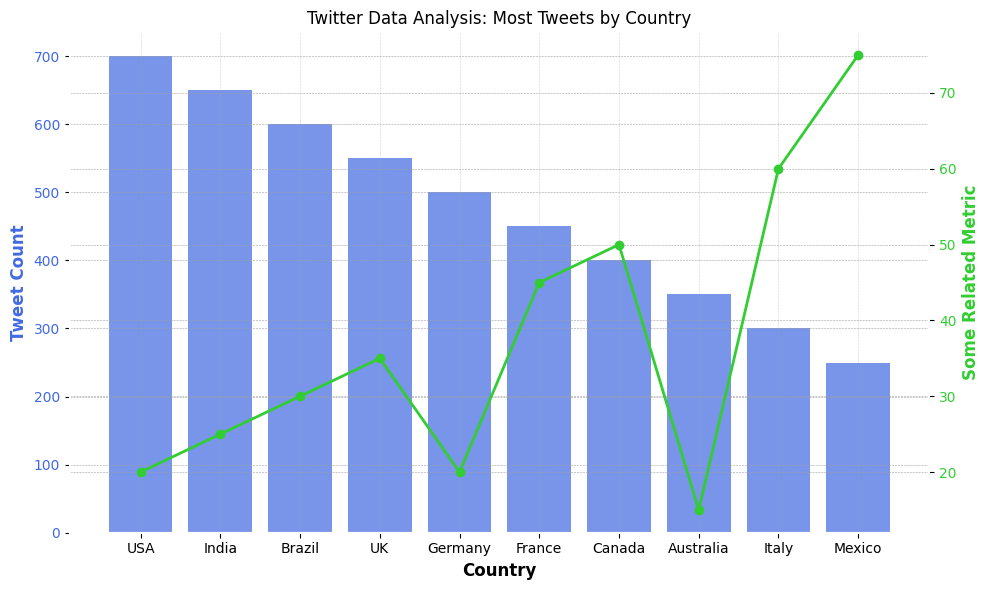

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


countries = ['USA', 'India', 'Brazil', 'UK', 'Germany', 'France', 'Canada', 'Australia', 'Italy', 'Mexico']
tweet_counts = [700, 650, 600, 550, 500, 450, 400, 350, 300, 250]
line_data = [20, 25, 30, 35, 20, 45, 50, 15, 60, 75]


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(countries, tweet_counts, color='royalblue', alpha=0.7, label='Tweet Count')


ax2 = ax1.twinx()
ax2.plot(countries, line_data, color='limegreen', marker='o', label='Some Related Metric', linewidth=2)

ax1.set_xlabel('Country')
ax1.set_ylabel('Tweet Count', color='royalblue')
ax2.set_ylabel('Some Related Metric', color='limegreen')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax2.tick_params(axis='y', labelcolor='limegreen')


ax1.grid(True, axis='x', linestyle='--', alpha=0.5)


plt.title('Twitter Data Analysis: Most Tweets by Country')
plt.xticks(rotation=45)
fig.tight_layout()

plt.show()


*Twitter Sentiment Analysis Dashboard*

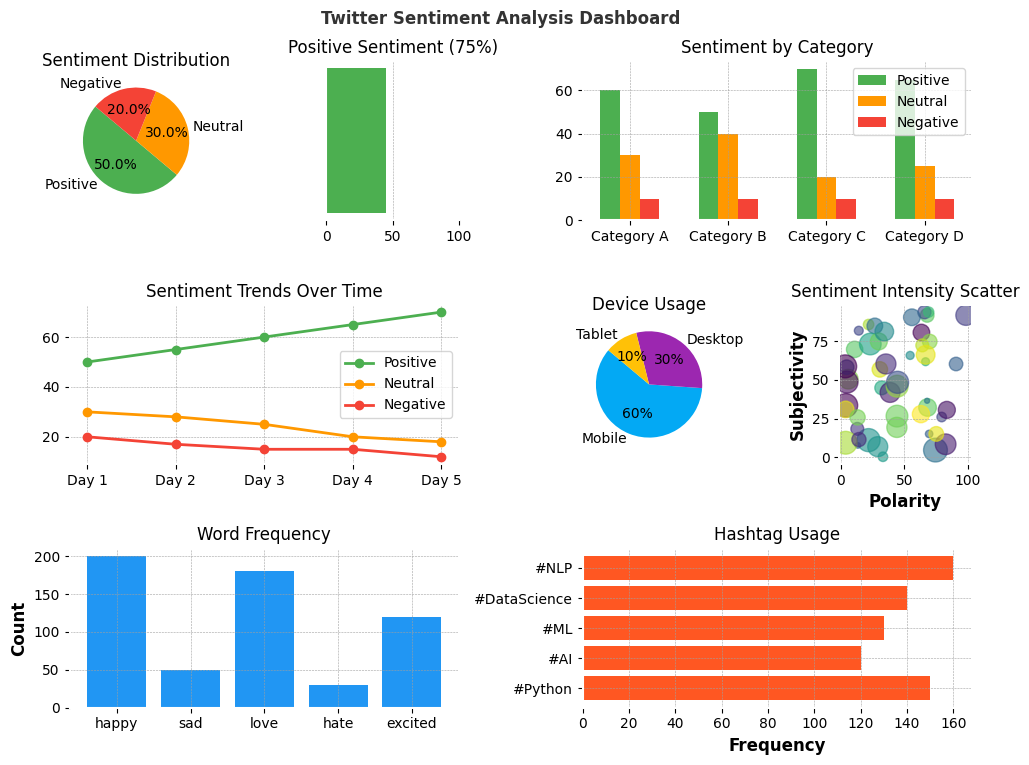

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 8))
fig.suptitle("        Twitter Sentiment Analysis Dashboard      ", fontsize=12, fontweight='bold', color="#333", y=0.95)


ax1 = plt.subplot2grid((3, 4), (0, 0))
sentiments = [50, 30, 20]
labels = ['Positive', 'Neutral', 'Negative']
colors = ['#4CAF50', '#FF9800', '#F44336']
ax1.pie(sentiments, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
ax1.set_title("\nSentiment Distribution")


ax2 = plt.subplot2grid((3, 4), (0, 1))
ax2.barh(['Positive'], [45], color='#4CAF50', height=0.3)
ax2.set_xlim(0, 100)
ax2.set_title("\nPositive Sentiment (75%)")
ax2.set_yticks([])

ax3 = plt.subplot2grid((3, 4), (0, 2), colspan=2)
categories = ['Category A', 'Category B', 'Category C', 'Category D']
positive = [60, 50, 70, 65]
neutral = [30, 40, 20, 25]
negative = [10, 10, 10, 10]
x = np.arange(len(categories))
width = 0.2

ax3.bar(x - width, positive, width, label='Positive', color='#4CAF50')
ax3.bar(x, neutral, width, label='Neutral', color='#FF9800')
ax3.bar(x + width, negative, width, label='Negative', color='#F44336')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.set_title("Sentiment by Category")
ax3.legend()


ax4 = plt.subplot2grid((3, 4), (1, 0), colspan=2)
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
positive_trend = [50, 55, 60, 65, 70]
neutral_trend = [30, 28, 25, 20, 18]
negative_trend = [20, 17, 15, 15, 12]

ax4.plot(days, positive_trend, marker='o', label='Positive', color='#4CAF50')
ax4.plot(days, neutral_trend, marker='o', label='Neutral', color='#FF9800')
ax4.plot(days, negative_trend, marker='o', label='Negative', color='#F44336')
ax4.set_title("Sentiment Trends Over Time")
ax4.legend()

ax5 = plt.subplot2grid((3, 4), (1, 2))
devices = [60, 30, 10]
labels = ['Mobile', 'Desktop', 'Tablet']
colors = ['#03A9F4', '#9C27B0', '#FFC107']
ax5.pie(devices, labels=labels, autopct='%1.0f%%', colors=colors, startangle=140)
ax5.set_title("Device Usage")

ax6 = plt.subplot2grid((3, 4), (1, 3))
x = np.random.uniform(0, 100, 50)
y = np.random.uniform(0, 100, 50)
sizes = np.random.uniform(10, 300, 50)
ax6.scatter(x, y, s=sizes, c=np.random.rand(50), alpha=0.6, cmap='viridis')
ax6.set_title("Sentiment Intensity Scatter")
ax6.set_xlabel("Polarity")
ax6.set_ylabel("Subjectivity")

ax7 = plt.subplot2grid((3, 4), (2, 0), colspan=2)
words = ['happy', 'sad', 'love', 'hate', 'excited']
frequencies = [200, 50, 180, 30, 120]
ax7.bar(words, frequencies, color='#2196F3')
ax7.set_title("Word Frequency")
ax7.set_ylabel("Count")


ax8 = plt.subplot2grid((3, 4), (2, 2), colspan=2)
hashtags = ['#Python', '#AI', '#ML', '#DataScience', '#NLP']
usage = [150, 120, 130, 140, 160]
ax8.barh(hashtags, usage, color='#FF5722')
ax8.set_title("Hashtag Usage")
ax8.set_xlabel("Frequency")


plt.tight_layout()
plt.show()
